In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

In [12]:
df= pd.read_csv("AB_NYC_2019.csv")

In [3]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [14]:
#Extract numerical features for examination
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.columns

##Extract categorical features for examination
categorical_df = df.select_dtypes(include=[np.object])
categorical_df.columns


C:\Users\Shaun\AppData\Local\Temp\ipykernel_9788\1500037191.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_df = df.select_dtypes(include=[np.object])


Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')

In [10]:
#numeric_df = numeric_df.drop(['id', 'latitude', 'number_of_reviews'], axis = 1) # , 'longitude', 'host_id'

Text(0.5, 1.0, ' Numeric Correlation Matrix')

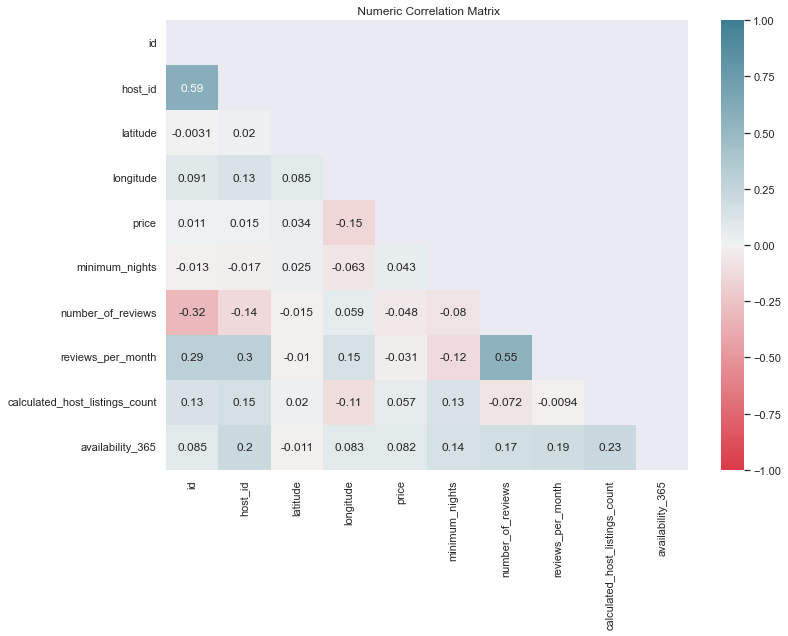

In [15]:
#Correlation Heatmap
numeric_corr = numeric_df.corr()
# Create colormap 
cmap = sns.diverging_palette(10, 220,as_cmap=True)
#Create mask to hide repeated data
mask = np.zeros_like(numeric_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# plot matrix  with annotations
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(numeric_corr, xticklabels=numeric_df.columns, mask=mask, cmap=cmap, yticklabels=numeric_df.columns, annot=True, vmin=-1, vmax=1)
plt.title(' Numeric Correlation Matrix')

<AxesSubplot:xlabel='room_type', ylabel='count'>

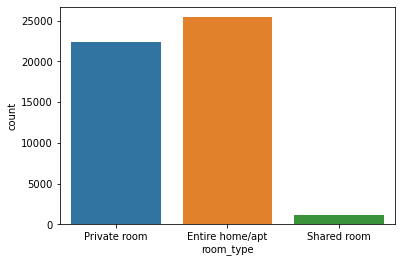

In [33]:
sns.countplot(x="room_type", data=df)

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

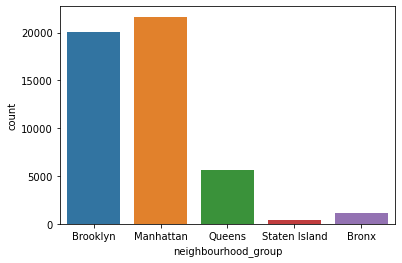

In [37]:
sns.countplot(x="neighbourhood_group", data=df)

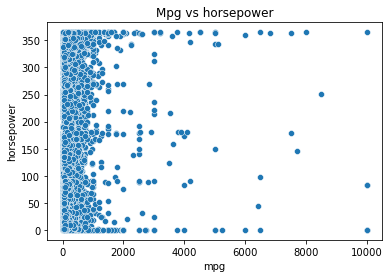

In [42]:
sns.scatterplot(x= 'price', y='availability_365', data= df)
plt.ylabel('Availability')
plt.xlabel('Price')
plt.title('Price vs Availability')
plt.show()

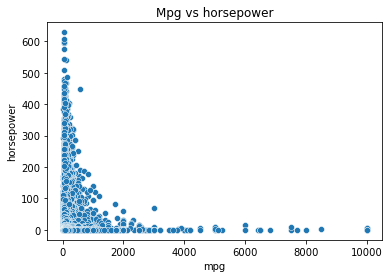

In [43]:
sns.scatterplot(x= 'price', y='number_of_reviews', data= df)
plt.ylabel('Number of Reviews')
plt.xlabel('Price')
plt.title('Mpg vs Number of Reviews')
plt.show()

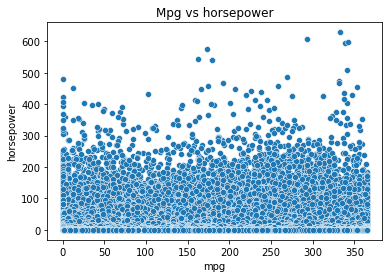

In [44]:
sns.scatterplot(x= 'availability_365', y='number_of_reviews', data= df)
plt.ylabel('Number of Reviews')
plt.xlabel('Availability')
plt.title('Availability vs Number of Reviews')
plt.show()

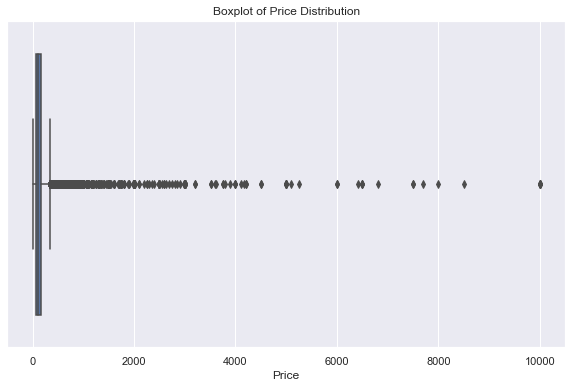

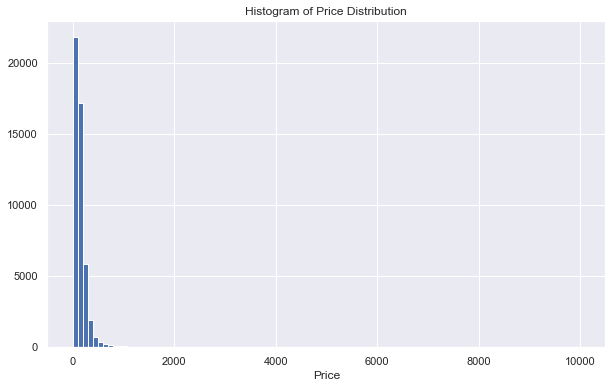

C:\Users\Shaun\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


-inf

In [17]:
df[df['price'] <= 0].size
df[df['price'] <= 0].sort_values(by='price', ascending=True)
#Distribution of Prices,
# Create a boxplot for the price distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price Distribution')
plt.xlabel('Price')
plt.show()
# Create a boxplot for the price distribution
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=100)
plt.title('Histogram of Price Distribution')
plt.xlabel('Price')
plt.show()
df['normalised_price'] = np.log(df['price'])
# Create a boxplot for the price distribution
# plt.figure(figsize=(10, 6))
# plt.hist(df['normalised_price'], bins=10)
# plt.title('Histogram of Normalized Price Distribution')
# plt.xlabel('Normalised Price')
# plt.show()
df['normalised_price'].min()


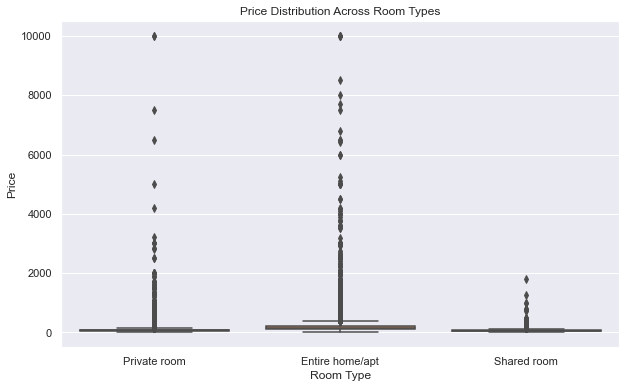

C:\Users\Shaun\AppData\Local\Temp\ipykernel_9788\2926807053.py:13: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_df = df.select_dtypes(include=[np.object])


Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')

In [18]:
#Room Types
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Price Distribution Across Room Types')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()
#Extract numerical features for examination
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.columns

##Extract categorical features for examination
categorical_df = df.select_dtypes(include=[np.object])
categorical_df.columns

In [23]:
df['price'].count()

48895

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'df' is your DataFrame
X = df[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [25]:
#Percentage of values missing
df.isnull().sum() / df.shape[0] * 100

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
normalised_price                   0.000000
dtype: float64

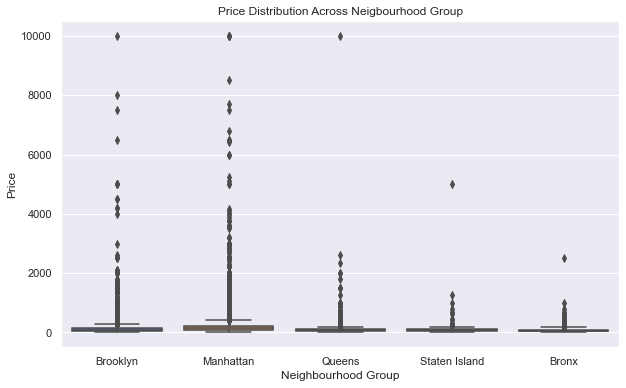

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.title('Price Distribution Across Neigbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.show()

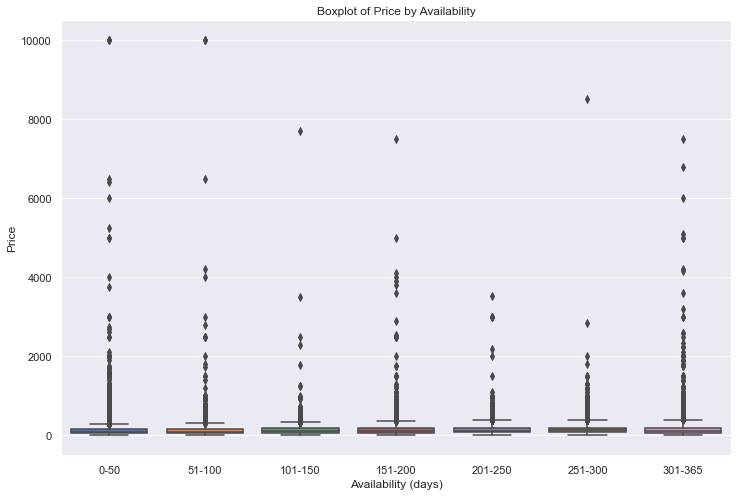

In [32]:
# Bin the 'availability_365' variable
bins = [0, 50, 100, 150, 200, 250, 300, 365]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-365']

df['availability_bin'] = pd.cut(df['availability_365'], bins=bins, labels=labels, right=False)

# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='availability_bin', y='price', data=df)
plt.title('Boxplot of Price by Availability')
plt.xlabel('Availability (days)')
plt.ylabel('Price')
plt.show()

In [34]:
# Count number of rows with price over a 1000
count_high_price = df[df['price'] > 1000].shape[0]

print(f'The number of entries with a price over $1000 is: {count_high_price}')


The number of entries with a price over $2000 is: 239


In [ ]:
'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 